## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [1]:
api_key = "1XE2UKG2DV1AFGG9"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [2]:
ticker = "TSLA"

Import the appropriate libraries in the lines below each comment:

In [3]:
# pandas
import pandas as pd
# requests
import requests
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries
# mmatplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request
(refer to the Alpha Vantage documention)

Assign the API url to the variable "link" and format the url string to include the "api_key" variable and the "ticker".

In [4]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=5min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min&apikey=1XE2UKG2DV1AFGG9


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [5]:
fb = requests.get(link)

Print the HTTP response:

In [6]:
print(fb)

<Response [200]>


Print the data:

In [7]:
print(fb.text)

{
    "Meta Data": {
        "1. Information": "Intraday (5min) open, high, low, close prices and volume",
        "2. Symbol": "TSLA",
        "3. Last Refreshed": "2019-09-30 16:00:00",
        "4. Interval": "5min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (5min)": {
        "2019-09-30 16:00:00": {
            "1. open": "240.2200",
            "2. high": "241.0000",
            "3. low": "240.2200",
            "4. close": "240.8400",
            "5. volume": "220039"
        },
        "2019-09-30 15:55:00": {
            "1. open": "240.1600",
            "2. high": "240.6750",
            "3. low": "240.1300",
            "4. close": "240.2300",
            "5. volume": "110134"
        },
        "2019-09-30 15:50:00": {
            "1. open": "240.6739",
            "2. high": "240.8784",
            "3. low": "240.2078",
            "4. close": "240.2639",
            "5. volume": "109126"
        },
        "2019-09-3

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier:

In [8]:
ts = TimeSeries(key=api_key,output_format='pandas')
data, meta_data = ts.get_intraday(symbol='TSLA',interval='1min', outputsize='compact')
print(data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-09-30 14:21:00  240.4500  240.4700  240.3063  240.3063     3946.0
2019-09-30 14:22:00  240.3800  240.5000  240.3400  240.4800     6033.0
2019-09-30 14:23:00  240.5000  240.5300  240.0800  240.0890    23490.0
2019-09-30 14:24:00  240.1510  240.2730  240.1500  240.2730     5302.0
2019-09-30 14:25:00  240.2208  240.4900  240.2208  240.4699     9707.0
2019-09-30 14:26:00  240.4100  240.4100  239.9200  239.9450    11956.0
2019-09-30 14:27:00  239.9900  240.1000  239.9900  240.0900     2997.0
2019-09-30 14:28:00  240.0723  240.1100  240.0500  240.1100     3765.0
2019-09-30 14:29:00  240.1000  240.2600  240.0700  240.2500     9283.0
2019-09-30 14:30:00  240.3700  240.5232  240.3578  240.5232     9475.0
2019-09-30 14:31:00  240.5100  240.6600  240.4600  240.6400    10058.0
2019-09-30 14:32:00  240.7400  240.7400  240.5100  240.6800     9095.0
2019-0

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [9]:
data, meta_data = ts.get_intraday(symbol='FB',interval='1min', outputsize='compact')

Print the data:

In [10]:
print(data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-09-30 14:21:00  178.2400  178.3000  178.2400  178.2740    10393.0
2019-09-30 14:22:00  178.3000  178.3475  178.2900  178.3100    14760.0
2019-09-30 14:23:00  178.3000  178.3100  178.1800  178.2200     8369.0
2019-09-30 14:24:00  178.2200  178.2500  178.1800  178.2400     8441.0
2019-09-30 14:25:00  178.2500  178.3000  178.2405  178.2600     7910.0
2019-09-30 14:26:00  178.2600  178.2618  178.2000  178.2200    14024.0
2019-09-30 14:27:00  178.2200  178.3506  178.2050  178.3506    12349.0
2019-09-30 14:28:00  178.3600  178.4100  178.3600  178.4000    20425.0
2019-09-30 14:29:00  178.4000  178.4628  178.4000  178.4050    28399.0
2019-09-30 14:30:00  178.4000  178.5700  178.4000  178.5480    60069.0
2019-09-30 14:31:00  178.5423  178.5700  178.4800  178.5400    40784.0
2019-09-30 14:32:00  178.5500  178.5500  178.4600  178.5000    27873.0
2019-0

Plot one column of the time series data with the ticket symbol as the title of the graph:

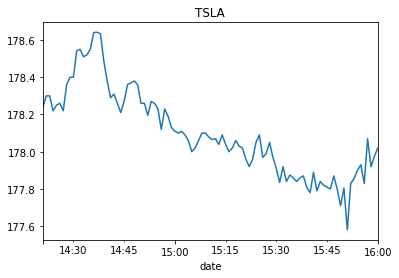

In [11]:
data['1. open'].plot()
plt.title(ticker)
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [12]:
data.to_excel("fb_stock_data.xlsx")